### This script analyses results/distances.pkl

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# global imports
import sys
import time
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# local imports
import utils

# general settings  
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=14)
plt.rc('legend', fontsize=14)
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('axes', edgecolor='k')
plt.rc('xtick.major', width=2)
plt.rc('xtick.major', size=6)
plt.rc('ytick.major', width=2)
plt.rc('ytick.major', size=6)
plt.rc('pdf', fonttype=42)
plt.rc('ps', fonttype=42)

In [2]:
%%time
# subset of attributes
attributes = utils.get_attributes('subset1')
print('Attributes', attributes)
states = set(utils.states)
nstates = len(states)
print('No States', nstates)

# load distances (see 01_CalculateDistances.ipynb)
dists = pickle.load( open("results/distances.pkl", "rb" ) )
# restrict to subset and states
dists = { k:{att:d for att, d in v.items() if att in attributes} for k, v in dists.items() if k[0] in states and k[1] in states and k[0] != k[1]}

Attributes ['SCHL', 'MAR', 'AGEP', 'SEX', 'CIT', 'RAC1P']
No States 50
Wall time: 158 ms


In [3]:
# d_att for all source-target states and atts
d_att = [v['d_att'] for k, d in dists.items() for a, v in d.items()]
# d_y_cond for all source-target states and atts
d_y_cond = [v['d_y_cond'] for k, d in dists.items() for a, v in d.items()]
# attribute to position
a2pos = {a:i for i, a in enumerate(attributes)}
# atts positions
atts = [a2pos[a] for k, d in dists.items() for a, v in d.items()]

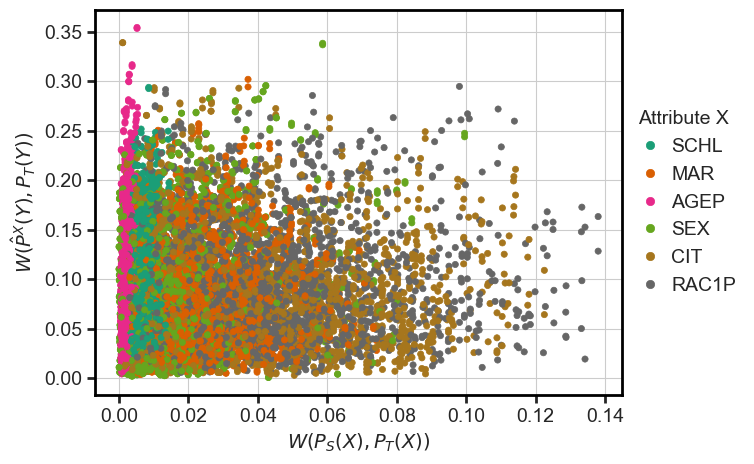

In [4]:
_, ax = plt.subplots(figsize=(4, 5))
scatter = ax.scatter(d_att, d_y_cond, c=atts, linewidths = .5, marker ="o", s=20, cmap="Dark2") # https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.xlabel('$W( P_S(X), P_T(X) )$')
plt.ylabel('$W( \hat{P}^X(Y), P_T(Y) )$')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 1.7, pos.height])
ax.legend(scatter.legend_elements()[0], attributes, title="Attribute X", loc='center right', handletextpad=0.1, bbox_to_anchor=(1.25, 0.5))
plt.savefig('results/fig1.png', bbox_inches='tight', dpi=400)
plt.show()

In [5]:
# target domain attribute for probability estimation (X_w in Eq. 13)
att_xws = dict()
x, y, c = [], [], []
for source in states:
    for target in states:
        if source == target:
            continue
        _dict = dists[(source, target)]
        # target domain knowledge: select attribute with smallest marginal conditional distance
        att_xw = min(_dict, key=lambda k: _dict[k]['d_y_cond'])
        att_xws[(source, target)] = att_xw
        x.append(_dict[att_xw]['d_att'])
        y.append(_dict[att_xw]['d_y_cond'])
        c.append(a2pos[att_xw])

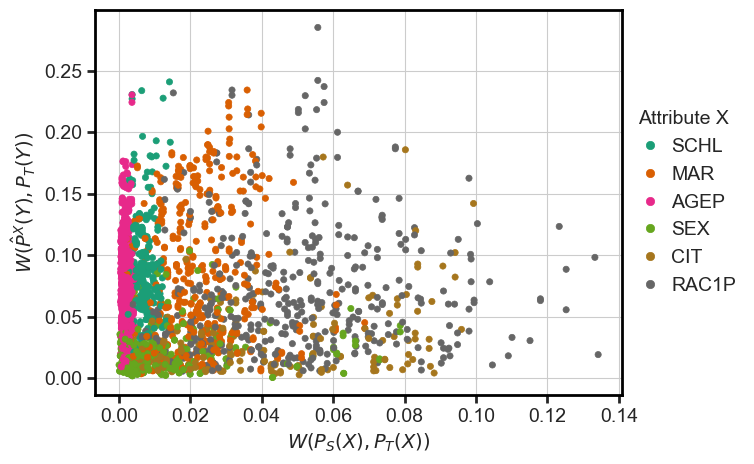

In [6]:
# Same plot but only for the atts that minimize the d_y_cond for each source-target pair
_, ax = plt.subplots(figsize=(4, 5))
scatter = ax.scatter(x, y, c=c, linewidths = .5, marker ="o", s=20, cmap="Dark2")
plt.xlabel('$W( P_S(X), P_T(X) )$')
plt.ylabel('$W( \hat{P}^X(Y), P_T(Y) )$')
pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width * 1.7, pos.height])
ax.legend(scatter.legend_elements()[0], attributes, title="Attribute X", loc='center right', handletextpad=0.1, bbox_to_anchor=(1.25, 0.5))
plt.show()